<a href="https://colab.research.google.com/github/cedro3/others2/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras AutoEncoder で異常検知をやってみる


In [1]:
# tensolflowバージョン1.x　を選択
%tensorflow_version 1.x

TensorFlow 1.x selected.


Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


11493376/11490434 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 49500 samples, validate on 10500 samples
Epoch 1/50
49500/49500 [==============================] - 2s 31us/step - loss: 0.3781 - val_loss: 0.2760
Epoch 2/50
49500/49500 [==============================] - 1s 13us/step - loss: 0.2703 - val_loss: 0.2653
Epoch 3/50
49500/49500 [==============================] - 1s 13us/step - loss: 0.2568 - val_loss: 0.2480
Epoch 4/50
49500/49500 [==============================] - 1s 12us/step - loss: 0.2375 - val_loss: 0.2288
Epoch 5/50
49500/49500 [==============================] - 1s 13us/step - loss: 0.2204 - val_loss: 0.2139
Epoch 6/50
49500/49500 [==============================] - 1s 13us/step - loss: 0.2077 - val_loss: 0.2032
Epoch 7/50
49500/49500 [==============================] - 1s 13us/step - loss: 0.1983 - val_loss: 0.1949
Epoch 8/50
49500/49500 [==============================] - 1s 13us/step - loss: 0.1908 - val_loss: 0.1881
Epoch 9/50
49500/49500 [==============================] - 1s 13us/step - loss: 0.1846 - val_loss: 0.1823
Epoc

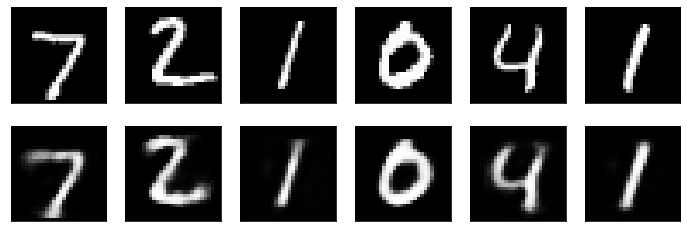

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
 
# AutoEncoder ネットワーク構築
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
 
# MNIST データ読み込み
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
# データの前準備
x_train, x_valid = train_test_split(x_train, test_size=0.175)
x_train = x_train.astype('float32')/255.
x_valid = x_valid.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_valid = x_valid.reshape((len(x_valid), np.prod(x_valid.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
 
# 学習
autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_valid, x_valid))
 
# 出力画像の取得
decoded_imgs = autoencoder.predict(x_test)
 
# サンプル画像表示
n = 6
plt.figure(figsize=(12, 4))
for i in range(n):
    # テスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # 出力画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("result.png")
plt.show()

In [3]:
# 学習データを「１」のみにする
x1 =[]
for i in range(len(x_train)):
    if y_train[i] == 1 :
       x1.append(x_train[i])
x_train = np.array(x1)
 
# テストデータを「１」と「９」にする
x2, y = [],[]
for i in range(len(x_test)):
    if y_test[i] == 1 or y_test[i] == 9 :
       x2.append(x_test[i])
       y.append(y_test[i])
x_test = np.array(x2)
y = np.array(y)

Train on 5623 samples, validate on 10500 samples
Epoch 1/300
5623/5623 [==============================] - 0s 26us/step - loss: 0.1082 - val_loss: 0.1085
Epoch 2/300
 256/5623 [>.............................] - ETA: 0s - loss: 0.1057

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


5623/5623 [==============================] - 0s 26us/step - loss: 0.1081 - val_loss: 0.1084
Epoch 3/300
5623/5623 [==============================] - 0s 27us/step - loss: 0.1080 - val_loss: 0.1084
Epoch 4/300
5623/5623 [==============================] - 0s 27us/step - loss: 0.1079 - val_loss: 0.1083
Epoch 5/300
5623/5623 [==============================] - 0s 25us/step - loss: 0.1079 - val_loss: 0.1083
Epoch 6/300
5623/5623 [==============================] - 0s 27us/step - loss: 0.1078 - val_loss: 0.1082
Epoch 7/300
5623/5623 [==============================] - 0s 26us/step - loss: 0.1077 - val_loss: 0.1082
Epoch 8/300
5623/5623 [==============================] - 0s 26us/step - loss: 0.1077 - val_loss: 0.1081
Epoch 9/300
5623/5623 [==============================] - 0s 26us/step - loss: 0.1076 - val_loss: 0.1081
Epoch 10/300
5623/5623 [==============================] - 0s 27us/step - loss: 0.1075 - val_loss: 0.1080
Epoch 11/300
5623/5623 [==============================] - 0s 26us/step - lo

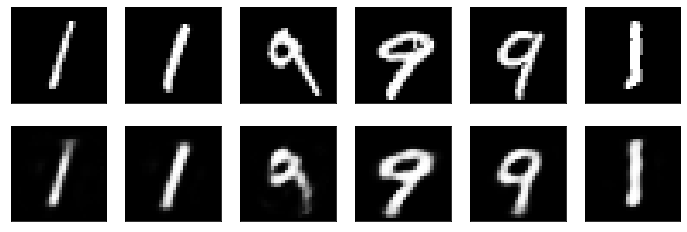

In [4]:
# 学習
autoencoder.fit(x_train, x_train,
                nb_epoch=300,
                batch_size=256,
                shuffle=True,
                validation_data=(x_valid, x_valid))
 
# 出力画像の取得
decoded_imgs = autoencoder.predict(x_test)
 
# サンプル画像表示
n = 6
plt.figure(figsize=(12, 4))
for i in range(n):
    # テスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # 出力画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("result.png")
plt.show()

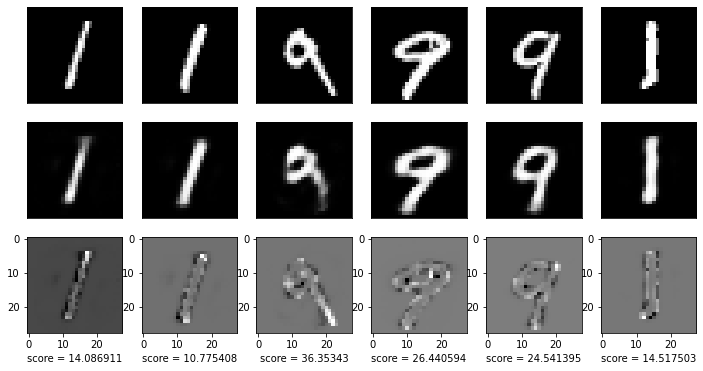

In [5]:
# サンプル画像表示
n = 6
plt.figure(figsize=(12, 6))
for i in range(n):
    # テスト画像を表示
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # 出力画像を表示
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 入出力の差分画像を計算
    diff_img = x_test[i] - decoded_imgs[i]
    
    # 入出力の差分数値を計算
    diff = np.sum(np.abs(x_test[i]-decoded_imgs[i]))
        
    # 差分画像と差分数値の表示
    ax = plt.subplot(3, n, i+1+n*2)
    plt.imshow(diff_img.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True) 
    ax.set_xlabel('score = '+str(diff))    
        
plt.savefig("result.png")
plt.show()
plt.close()

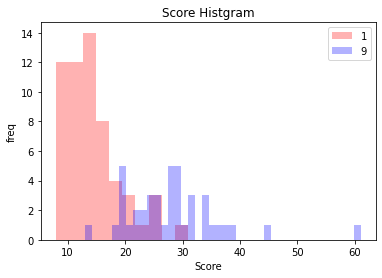

In [6]:
# score を記録したファイルがあれば一端クリア
import os
if os.path.exists('scores_1.txt'):
   os.remove('scores_1.txt')
if os.path.exists('scores_9.txt'):
   os.remove('scores_9.txt')
 
# score の計算、結果のファイル保存
for i in range(100):
    score = np.sum(np.abs(x_test[i]-decoded_imgs[i]))
    
    if y[i] == 1:
       with open('scores_1.txt','a') as f:
            f.write(str(score)+'\n')            
    else:
       with open('scores_9.txt','a') as f:
            f.write(str(score)+'\n')
 
# ファイルを元にヒストグラムの表示
import matplotlib.pyplot as plt
import csv
    
x =[]
with open('scores_1.txt', 'r') as f:
     reader = csv.reader(f)
     for row in reader:
         row = int(float(row[0]))
         x.append(row)
y =[]
with open('scores_9.txt', 'r') as f:
     reader = csv.reader(f)
     for row in reader:
         row = int(float(row[0]))
         y.append(row)
             
plt.title("Score Histgram")
plt.xlabel("Score")
plt.ylabel("freq")
plt.hist(x, bins=10, alpha=0.3, histtype='stepfilled', color='r', label="1")
plt.hist(y, bins=40, alpha=0.3, histtype='stepfilled', color='b', label='9')
plt.legend(loc=1)
plt.savefig("histgram.png")
plt.show()
plt.close()